In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_heart = pd.read_csv("cardio_train.csv", sep=",", index_col=0)

In [4]:
df_heart

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[70000 rows x 13 columns]

In [5]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 7.5 MB


In [6]:
df_heart.describe()

id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250      0.572270      0.283484   
min     -150.000000    -70.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max    16020.000000  11000.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  70000.000000  70000.000000  70000.000000  
mean       0.053771      0.803729      0.499700  
std        0.225568      0.397179      0.500003  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

In [7]:
df_heart.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [17]:
fig = make_subplots(rows=4, cols=2)
fig.add_trace(go.Box(x=df_heart["age"]/365,name="Age"), row=1, col=1)
fig.add_trace(go.Box(x=df_heart["weight"],name="Weight"), row=2, col=1)
fig.add_trace(go.Box(x=df_heart["ap_hi"],name="Systolic Blood Pressure"), row=3, col=1)
fig.add_trace(go.Box(x=df_heart["ap_lo"],name="Diastolic Blood Pressure"), row=4, col=1)

fig.update_layout(height=800)
fig.show()

In [28]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=3)

fig.add_trace(go.Bar(y=df_heart["gender"].value_counts(), x=["Feminine","Masculine"], name="Gender"), row=1, col=1)
fig.add_trace(go.Bar(y=df_heart["cholesterol"].value_counts(), x=["Normal","Above Normal","Very High"], name="Cholesterol"), row=1, col=2)
fig.add_trace(go.Bar(y=df_heart["gluc"].value_counts(), x=["Normal","Above Normal","Very High"], name="Glucose"), row=1, col=3)
fig.add_trace(go.Bar(y=df_heart["smoke"].value_counts(), x=["Non-Smoker","Smoker"], name="Smoker"), row=2, col=1)
fig.add_trace(go.Bar(y=df_heart["alco"].value_counts(), x=["Non-Drinker","Drinker"], name="Alcohol Consumption"), row=2, col=2)
fig.add_trace(go.Bar(y=df_heart["active"].value_counts(), x=["Non Active","Active"], name="Activeness"), row=2, col=3)


fig.update_layout(height=700)
fig.show()

In [24]:
df_heart["cardio"].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [26]:
df_heart.groupby(["smoke", "cardio"]).count()["id"]

smoke  cardio
0      0         31781
       1         32050
1      0          3240
       1          2929
Name: id, dtype: int64

In [29]:
Y = df_heart["cardio"]
X = df_heart.loc[:,df_heart.columns != 'cardio']

In [30]:
X

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  
0          0     0       1  
1          0     0       1  
2          0     0       0  
3          0     0       1  
4          0     0       0  
...      ...   ...     ...  
69995      1     0       1  
69996      0     0       1  
69997      0     1       0  
69998      0     0       0  
69999      0     0       1  

[70000 rows x 12 columns]

In [31]:
Y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.30, random_state=42)

In [34]:
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (49000, 12)
x_test shape: (21000, 12)
y_train shape: (49000,)
y_test shape: (21000,)


In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 35, n_jobs = 5, max_depth=4)
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=35, n_jobs=5)

In [36]:
x_test.iloc[0].to_frame().transpose()

id      age  gender  height  weight  ap_hi  ap_lo  cholesterol  \
46730  66728.0  21770.0     1.0   156.0    64.0  140.0   80.0          2.0   

       gluc  smoke  alco  active  
46730   1.0    0.0   0.0     1.0

In [37]:
rf_model.predict(x_test.iloc[0].to_frame().transpose())

array([1], dtype=int64)

In [38]:
y_train.iloc[0]

1

In [39]:
predictions = rf_model.predict(x_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75     10461
           1       0.76      0.68      0.72     10539

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000

[[8231 2230]
 [3401 7138]]


In [42]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf_model, x_test, y_test, n_repeats=10, n_jobs=2)

In [46]:
index = result.importances_mean.argsort()

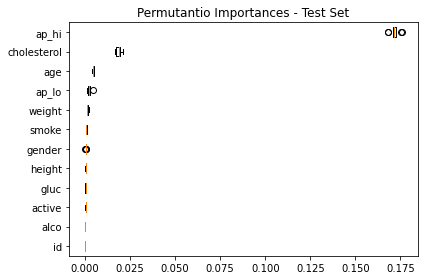

In [47]:
fig, ax = plt.subplots()
ax.boxplot(result.importances[index].T, vert=False, labels=x_test.columns[index])
ax.set_title("Permutantio Importances - Test Set")
fig.tight_layout()
plt.show()

In [49]:
import shap

ModuleNotFoundError: No module named 'shap'